In [131]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

def indicadora(u, x):
    return 1 if u >= x else 0

def pdf_normal(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

def variance_numeric(ones, n):
    a = [1] * ones
    b = [0] * (n-ones)
    a.extend(b)
    c = np.array(a)
    return np.std(c)**2

def monte_carlo_basic(n=1000000, x=5):
    ones = 0
    for i in range(n):
        draw = np.random.normal(0, 1.0) # mu = 5, sigma = 1.0
        ones += indicadora(draw, x)
    return ones/n

def monte_carlo(n=1000000, x=5):
    ones = 0
    for i in range(n):
        draw = np.random.normal(x, 1.0) # mu = 5, sigma = 1.0
        g = pdf_normal(draw, 0, 1.0)
        h = pdf_normal(draw, x, 1.0)
        #ones += g/h
        ones += indicadora(draw, x) * g/h
    return ones/n
  
K = 0
for i in range(1, 1000+1):
    K += i**(2)
    
vec = []
for i in range(1, 1000+1):
    vec.append(i**(2)/K)
    
summ = np.sum(vec)

vec = vec/summ

def monte_carlo_uniform(n=1000000, x=995):
    ones = 0
    for i in range(n):
        #draw = random.randint(1,1000)
        draw = np.random.choice(1000, p=vec) + 1 #random.randint(1, N)
        #ones += 1 if draw >= x else 0
        g = 1/1000
        h = draw**(2) / K
        ones += (1 if draw >= x else 0) *g/h
    return ones/n

In [2]:
monte_carlo()

1

In [3]:
variance_numeric(1, 1000000)

9.999989999999955e-07

In [45]:
158418/1000000

0.158418

In [6]:
1/1000000 - (1/1000000)**2

9.99999e-07

In [129]:
monte_carlo(x=5)

2.866562785798612e-07

In [81]:
2.6462192544587395e-07

2.6462192544587395e-07

In [114]:
monte_carlo_uniform(x=995)

0.00601382023392569

In [119]:
np.random.normal(5, 0.01)

5.01656921401776

In [122]:
np.random.normal(0, 0.1)

-0.059384256957549314

In [123]:
pdf_normal(-0.059384256957549314, 0, 1.0)

0.3982394672233284

In [130]:
x = np.arange(0,10**6+10000,10000)
x[0] = 1

In [133]:
import time
no_importance = []
importance = []
start_time = time.time()
for i in range(len(x)):
    e = monte_carlo_basic(n=x[i], x=5)
    s = monte_carlo(n=x[i], x=5)
    no_importance.append(e)
    importance.append(s)
elapsed_time = time.time() - start_time
time.strftime("Tempo de execucao: %H:%M:%S", time.gmtime(elapsed_time))

'Tempo de execucao: 00:08:33'

/home/rodrigoazs/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


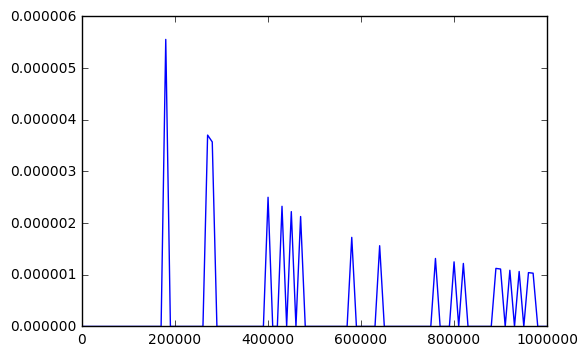

In [141]:
plt.plot(x, no_importance)
#plt.plot(x, importance, label='Com importance sampling')
plt.legend()
plt.show()

/home/rodrigoazs/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


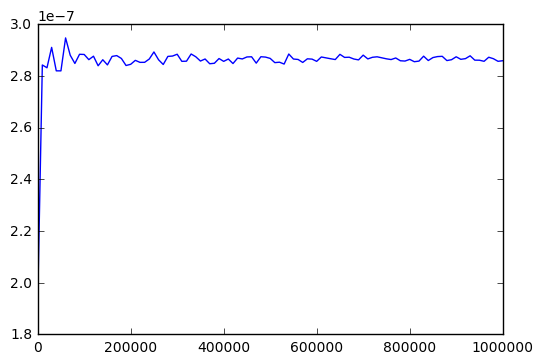

In [140]:
#plt.plot(x, no_importance, label='Sem importance sampling')
plt.plot(x, importance)
plt.legend()
plt.show()

In [137]:
importance

[1.92116492358444e-07,
 2.8431024016892193e-07,
 2.8322895448168667e-07,
 2.911181616897596e-07,
 2.820427941988685e-07,
 2.820319977716856e-07,
 2.9478037771189137e-07,
 2.880752490992383e-07,
 2.848974217833064e-07,
 2.884468026664581e-07,
 2.8837810881562625e-07,
 2.863704419711469e-07,
 2.8770819328892525e-07,
 2.8400496479754215e-07,
 2.8633413363236966e-07,
 2.843419466240758e-07,
 2.8762327465298643e-07,
 2.879392639397932e-07,
 2.8683348336992424e-07,
 2.841084655767866e-07,
 2.8456970280366056e-07,
 2.8610168387867266e-07,
 2.8532094144058185e-07,
 2.853393217652632e-07,
 2.8662053429293506e-07,
 2.893489596406998e-07,
 2.863181045166924e-07,
 2.8449952330643376e-07,
 2.8762930191068366e-07,
 2.8776894120647885e-07,
 2.8846692107657235e-07,
 2.8571993614948165e-07,
 2.857756822520561e-07,
 2.8856187452108954e-07,
 2.874895779376894e-07,
 2.8583342720796576e-07,
 2.866272062102862e-07,
 2.8478591228779076e-07,
 2.849736978398337e-07,
 2.8680428719248007e-07,
 2.857089925243166e